# [Kaggle-Students Test Data](https://www.kaggle.com/datasets/atharvbharaskar/students-test-data/data)

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_csv(os.getcwd() + '/data/students test/Private_data.csv').iloc[:, 2:]
df.head()

,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UNIVERSITY                            151 non-null    object 
 1   PROGRAM NAME                          151 non-null    object 
 2   Specialisation                        151 non-null    object 
 3   SEMESTER                              151 non-null    object 
 4   Domain                                151 non-null    object 
 5   GENERAL MANAGEMENT SCORE (OUT of 50)  151 non-null    int64  
 6   Domain Specific SCORE (OUT 50)        151 non-null    int64  
 7   TOTAL SCORE (OUT of 100)              151 non-null    int64  
 8   RANK                                  151 non-null    int64  
 9   PERCENTILE                            151 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 11.9+ KB


In [27]:
cate_feature = df.select_dtypes('object').columns
for col in cate_feature:
    print(f'## {col}, {len(df[col].unique())}개 ##')
    print(df[col].unique())

## UNIVERSITY, 7개 ##
['Stanford University, USA' 'Harvard University, USA'
 'University of Oxford, UK' 'University of Cambridge, UK'
 'Massachusetts Institute of Technology (MIT), USA'
 'California Institute of Technology (Caltech), USA'
 'Imperial College London, UK']
## PROGRAM NAME, 4개 ##
['B.Com' 'MBA' 'BBA' 'Intg. BBA+MBA']
## Specialisation, 14개 ##
['Honours' 'Financial Services' 'Accounting Analytics'
 'International Business' 'Business Analytics'
 'Information Technology with Accounting Analytics'
 'Innovation Entrepreneurship and Venture Development' 'Accounting'
 'Finance' 'Digital Marketing' 'Financial Services with Digital Finance'
 'Entrepreneurship & Innovation' 'Banking and Financial Services'
 'Brand Management']
## SEMESTER, 3개 ##
['5th' '3rd' '9th']
## Domain, 6개 ##
['Finance' 'BA' 'IB' 'E&I' 'DM' 'Generic']


In [3]:
df.describe()

,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,37.993377,33.635762,71.629139,76.000000,0.503311
std,10.734056,11.866751,21.200823,43.734045,0.289629
min,4.000000,1.000000,5.000000,1.000000,0.006623
25%,32.500000,27.000000,62.000000,38.500000,0.254967
50%,40.000000,36.000000,74.000000,76.000000,0.503311
75%,47.000000,43.000000,89.000000,113.500000,0.751656
max,50.000000,50.000000,100.000000,151.000000,1.000000


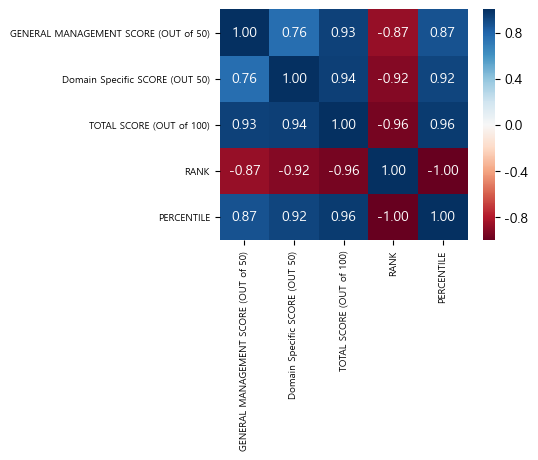

In [13]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='RdBu', fmt='.2f', annot=True)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 5:10].drop(['RANK', 'TOTAL SCORE (OUT of 100)'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
pca_fit = pca.fit(X_scaled)
print('분산설명력: ', pca.explained_variance_ratio_)

분산설명력:  [0.90066065 0.08120959 0.01812976]


- 분산설명력을 확인한 결과, 주성분의 개수는 1개가 적당한 것으로 나타났기에 하나의 주성분을 갖는 데이터프레임을 만든다.

In [31]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principalComponents, columns=['pc1'])
principal_df.head(3)

,pc1
0,-2.450009
1,-2.436311
2,-2.422614


In [38]:
# 원본 df와 principal_df 결합
df_pca = pd.concat([df, principal_df], axis=1).\
drop(['GENERAL MANAGEMENT SCORE (OUT of 50)', 'Domain Specific SCORE (OUT 50)', 'PERCENTILE', 'RANK'], axis=1)
df_pca.head(2)

,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,TOTAL SCORE (OUT of 100),pc1
0,"Stanford University, USA",B.Com,Honours,5th,Finance,100,-2.450009
1,"Stanford University, USA",B.Com,Financial Services,5th,Finance,100,-2.436311


In [40]:
# one-hot encoding
df_dum = pd.get_dummies(data=df_pca, columns=['UNIVERSITY', 'PROGRAM NAME', 'Specialisation', 'SEMESTER', 'Domain'])
df_dum.head(2)

,TOTAL SCORE (OUT of 100),pc1,"UNIVERSITY_California Institute of Technology (Caltech), USA","UNIVERSITY_Harvard University, USA","UNIVERSITY_Imperial College London, UK","UNIVERSITY_Massachusetts Institute of Technology (MIT), USA","UNIVERSITY_Stanford University, USA","UNIVERSITY_University of Cambridge, UK","UNIVERSITY_University of Oxford, UK",PROGRAM NAME_B.Com,...,Specialisation_International Business,SEMESTER_3rd,SEMESTER_5th,SEMESTER_9th,Domain_BA,Domain_DM,Domain_E&I,Domain_Finance,Domain_Generic,Domain_IB
0,100,-2.450009,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,100,-2.436311,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
X = df_dum.iloc[:, 1:]
y = df_dum.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)
rfr_reg = RandomForestRegressor(random_state=1234)
rfr_reg.fit(X_train, y_train)
pred = rfr_reg.predict(X_test)
rmse = round( np.sqrt(mean_squared_error(pred, y_test)) ,4)
print('RMSE: ', rmse)

RMSE:  0.5492


In [51]:
lgbm_reg = LGBMRegressor(random_state=1234)
lgbm_reg.fit(X_train, y_train)
pred = lgbm_reg.predict(X_test)
rmse = round( np.sqrt(mean_squared_error(pred, y_test)) ,4)
print('RMSE: ', rmse)

RMSE:  4.44


In [52]:
xgb_reg = XGBRegressor(random_state=1234)
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)
rmse = round( np.sqrt(mean_squared_error(pred, y_test)) ,4)
print('RMSE: ', rmse)

RMSE:  1.4625
